<a href="https://colab.research.google.com/github/FGalvao77/data-science-projects/blob/main/Atendimento_m%C3%A9dico_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atendimento médico**
 - Notebook utilizado para o bootcamp de machine learning

**Introdução**

Este conjunto de dados contém informações sobre os pacientes no Brasil, suas características e informações sobre a consulta, e se compareceram ou não à consulta. 

`Para cada ID do paciente, os dados listam a ID da consulta, o sexo do paciente, o dia em que a consulta foi agendada, o dia da consulta, a idade do paciente, o bairro em que o paciente reside, se o paciente é coberto por Bolsa Família, programa de assistência social no Brasil (bolsa de estudos), se o paciente tem diagnóstico de hipertensão, diabetes, alcoolismo ou deficiência, se o paciente recebeu mensagem de texto para lembrete de consulta (SMS)` e, por fim, se o paciente não faltou à consulta. 

 - Se eles compareceram ao compromisso, esta coluna indica **"No"**, não faltou ao comparecimento. Se eles NÃO compareceram à consulta, esta coluna indica **"Yes"**, faltaram à consulta.

Iremos explorar as seguintes questões que faz um paciente comparecer ou não a consulta. Segue as perguntas:

  - Os beneficiários do Bolsa Família tiveram uma taxa maior ou menor de não comparecimento?
  - Os pacientes com diagnóstico ou deficiência tiveram uma taxa maior ou menor de não comparecimento?
  - A idade ou o sexo afetaram a frequência às consultas?
  - Qual foi o impacto da diferença de tempo entre o dia em que a consulta foi agendada e o dia da consulta?
  - Como o recebimento de um lembrete por SMS afetou o comparecimento as consultas?

In [4]:
# importando as bibliotecas
import pandas as pd  # bibioteca responsável para o tratamento e limpeza dos dados
import numpy as np # biblioteca utilizada para o tratamento eficiente de dados numéricos
import datetime  # biblioteca utilizada para trabalhar com datas
from matplotlib import pyplot as plt  # plotar os gráficos
import seaborn as sns # plot de gráficos

%matplotlib inline

In [6]:
# importando os dados para o google colab
from google.colab import files
uploaded = files.upload()

Saving KaggleV2-May-2016.csv to KaggleV2-May-2016.csv


In [7]:
# carregando os dados para o pandas
df_consultas=pd.read_csv('KaggleV2-May-2016.csv')

## **Iniciando a análise exploratória dos dados**

In [8]:
# mostrando as características do dataset
df_consultas.head(10) # visualizando as 10 primeiras linhas

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


**Quantas instâncias e atributos existem no dataset?**

In [9]:
# visualizando as dimensões do dataset
df_consultas.shape

(110527, 14)

**Quais os nomes das colunas?**

In [10]:
# nome das colunas
df_consultas.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

`Vamos traduzir o nome das colunas!`

In [11]:
# traduzindo o nome das colunas
colunas_traduzidas = [
                      'Id_paciente',
                      'Id_consulta',
                      'Gênero',
                      'Dia_agendado',
                      'Dia_consulta',
                      'Idade',
                      'Bairro',
                      'Bolsa_família',
                      'Hipertensão',
                      'Diabetes',
                      'Alcoolismo',
                      'Deficiência',
                      'SMS_recebido',
                      'Não_comparecimento'
]

In [12]:
# condicional para avaliar se a quantidade de colunas no "df_consultas" é igual a "colunas_traduzidas"
len(df_consultas.columns) == len(colunas_traduzidas)

True

In [13]:
# carregando novamente o conjunto de dados com as colunas traduzidas
df_consultas = pd.read_csv('KaggleV2-May-2016.csv',
                       names=colunas_traduzidas, 
                       skiprows=1)

df_consultas.head()   # visualizando as 5 primeiras linhas

,Id_paciente,Id_consulta,Gênero,Dia_agendado,Dia_consulta,Idade,Bairro,Bolsa_família,Hipertensão,Diabetes,Alcoolismo,Deficiência,SMS_recebido,Não_comparecimento
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# visualizando as "características" da base de dados
df_consultas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id_paciente         110527 non-null  float64
 1   Id_consulta         110527 non-null  int64  
 2   Gênero              110527 non-null  object 
 3   Dia_agendado        110527 non-null  object 
 4   Dia_consulta        110527 non-null  object 
 5   Idade               110527 non-null  int64  
 6   Bairro              110527 non-null  object 
 7   Bolsa_família       110527 non-null  int64  
 8   Hipertensão         110527 non-null  int64  
 9   Diabetes            110527 non-null  int64  
 10  Alcoolismo          110527 non-null  int64  
 11  Deficiência         110527 non-null  int64  
 12  SMS_recebido        110527 non-null  int64  
 13  Não_comparecimento  110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Existem valores nulos?**

In [15]:
# contabilizando a quantidade de valores nulos
df_consultas.isnull().sum()

Id_paciente           0
Id_consulta           0
Gênero                0
Dia_agendado          0
Dia_consulta          0
Idade                 0
Bairro                0
Bolsa_família         0
Hipertensão           0
Diabetes              0
Alcoolismo            0
Deficiência           0
SMS_recebido          0
Não_comparecimento    0
dtype: int64

**Quantos pacientes não compareceram à consulta?**

In [16]:
df_consultas['Não_comparecimento'].value_counts() # "No" o paciente compareceu / "Yes" o paciente não compareceu

No     88208
Yes    22319
Name: Não_comparecimento, dtype: int64

In [17]:
# proporção de pacientes que não compareceu a consulta com o total de consultas
# print(df_consultas["No-show"].value_counts()) 
# print('')
print((df_consultas['Não_comparecimento'].value_counts()) / df_consultas.shape[0]*100)

No     79.806744
Yes    20.193256
Name: Não_comparecimento, dtype: float64


In [18]:
presente = (df_consultas['Não_comparecimento']).value_counts(True)*100
print(f'Não faltou a consulta: {(presente[0]):.0f}%')
print(f'Faltou a consulta: {(presente[1]):.0f}%')

Não faltou a consulta: 80%
Faltou a consulta: 20%


In [19]:
# total geral de comparecimento e não comparecimento
len(df_consultas['Não_comparecimento'])

110527

**Quantos pacientes receberam ou não o SMS?**

In [20]:
df_consultas.SMS_recebido.value_counts() # 0 não recebeu / 1 recebeu

0    75045
1    35482
Name: SMS_recebido, dtype: int64

In [21]:
# df_consultas['SMS_recebido'].value_counts() # 0 não recebeu / 1 recebeu

In [23]:
df_consultas['Não_comparecimento'].value_counts()['No']/len(df_consultas)

0.798067440534892

In [24]:
df_consultas['Não_comparecimento'].value_counts()['No']

88208

In [25]:
#analisando as "estatísticas do dataset"
df_consultas.describe()

,Id_paciente,Id_consulta,Idade,Bolsa_família,Hipertensão,Diabetes,Alcoolismo,Deficiência,SMS_recebido
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Qual é a idade média dos pacientes?**

In [26]:
# idade média dos pacientes
df_consultas.Idade.mean()

37.08887421173107

**Qual o paciente mais novo e de maior idade?**

In [27]:
print(f'Paciente de maior idade: {df_consultas.Idade.max()}')
print(f'Paciente de menor idade: {df_consultas.Idade.min()}')

Paciente de maior idade: 115
Paciente de menor idade: -1


In [28]:
# contando a quantidade de valores distintos em cada uma das colunas
for colunas in list(df_consultas.columns):
  print( "{0:25} {1}".format(colunas, df_consultas[colunas].nunique()) )

Id_paciente               62299
Id_consulta               110527
Gênero                    2
Dia_agendado              103549
Dia_consulta              27
Idade                     104
Bairro                    81
Bolsa_família             2
Hipertensão               2
Diabetes                  2
Alcoolismo                2
Deficiência               5
SMS_recebido              2
Não_comparecimento        2


**Em quantas localidades diferentes (Bairro) os pacientes residem?**

In [29]:
df_consultas.Bairro.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [30]:
for i in df_consultas.Bairro.unique():
  print(i)

JARDIM DA PENHA
MATA DA PRAIA
PONTAL DE CAMBURI
REPÚBLICA
GOIABEIRAS
ANDORINHAS
CONQUISTA
NOVA PALESTINA
DA PENHA
TABUAZEIRO
BENTO FERREIRA
SÃO PEDRO
SANTA MARTHA
SÃO CRISTÓVÃO
MARUÍPE
GRANDE VITÓRIA
SÃO BENEDITO
ILHA DAS CAIEIRAS
SANTO ANDRÉ
SOLON BORGES
BONFIM
JARDIM CAMBURI
MARIA ORTIZ
JABOUR
ANTÔNIO HONÓRIO
RESISTÊNCIA
ILHA DE SANTA MARIA
JUCUTUQUARA
MONTE BELO
MÁRIO CYPRESTE
SANTO ANTÔNIO
BELA VISTA
PRAIA DO SUÁ
SANTA HELENA
ITARARÉ
INHANGUETÁ
UNIVERSITÁRIO
SÃO JOSÉ
REDENÇÃO
SANTA CLARA
CENTRO
PARQUE MOSCOSO
DO MOSCOSO
SANTOS DUMONT
CARATOÍRA
ARIOVALDO FAVALESSA
ILHA DO FRADE
GURIGICA
JOANA D´ARC
CONSOLAÇÃO
PRAIA DO CANTO
BOA VISTA
MORADA DE CAMBURI
SANTA LUÍZA
SANTA LÚCIA
BARRO VERMELHO
ESTRELINHA
FORTE SÃO JOÃO
FONTE GRANDE
ENSEADA DO SUÁ
SANTOS REIS
PIEDADE
JESUS DE NAZARETH
SANTA TEREZA
CRUZAMENTO
ILHA DO PRÍNCIPE
ROMÃO
COMDUSA
SANTA CECÍLIA
VILA RUBIM
DE LOURDES
DO QUADRO
DO CABRAL
HORTO
SEGURANÇA DO LAR
ILHA DO BOI
FRADINHOS
NAZARETH
AEROPORTO
ILHAS OCEÂNICAS DE TRINDADE
PAR

In [31]:
print(f'Total de bairros: {len(df_consultas.Bairro.value_counts())}')

Total de bairros: 81


**Comparando a identificação do paciente (Id_paciente) com o número dos agendamentos das consultas (Id_consultas).**
 - O que podemos inferir?

In [32]:
print(len(df_consultas.Id_paciente.unique()))
print(len(df_consultas.Id_consulta.unique()))

62299
110527


In [33]:
total_pacientes = len(df_consultas.Id_paciente.unique())
total_consultas = len(df_consultas.Id_consulta.unique())

print(f'Média de consultas por paciente: {(total_consultas / total_pacientes):.1f}')

Média de consultas por paciente: 1.8


- Podemos inferir que, pelo menos mais de uma consulta passou o paciente 

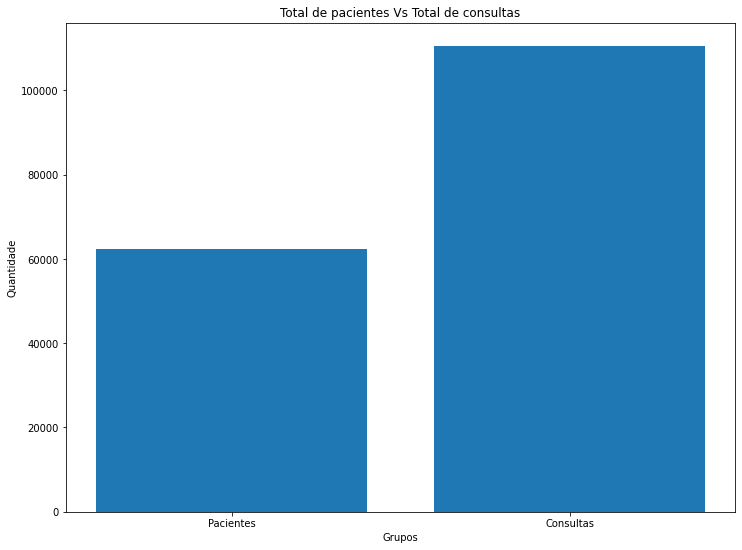

In [34]:
plt.figure(figsize=(12,9))
categorias = ['Pacientes', 'Consultas']
valores = [total_pacientes, total_consultas]
plt.bar(categorias,valores)
plt.xlabel('Grupos')
plt.ylabel('Quantidade')
plt.title('Total de pacientes Vs Total de consultas')
plt.show()

**Quantas variáveis binárias (apenas dois valores) existem no dataset?**

In [35]:
# contando quantas idades diferentes existem no df
df_consultas['Idade'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [36]:
# totalizando os valores da idade diferentes existem no df
df_consultas['Idade'].value_counts().count()

104

In [ ]:
# plotando o histograma de algumas variáveis 
# df_consultas['Idade'].hist(bins=len(df_consultas['Idade'].unique()));

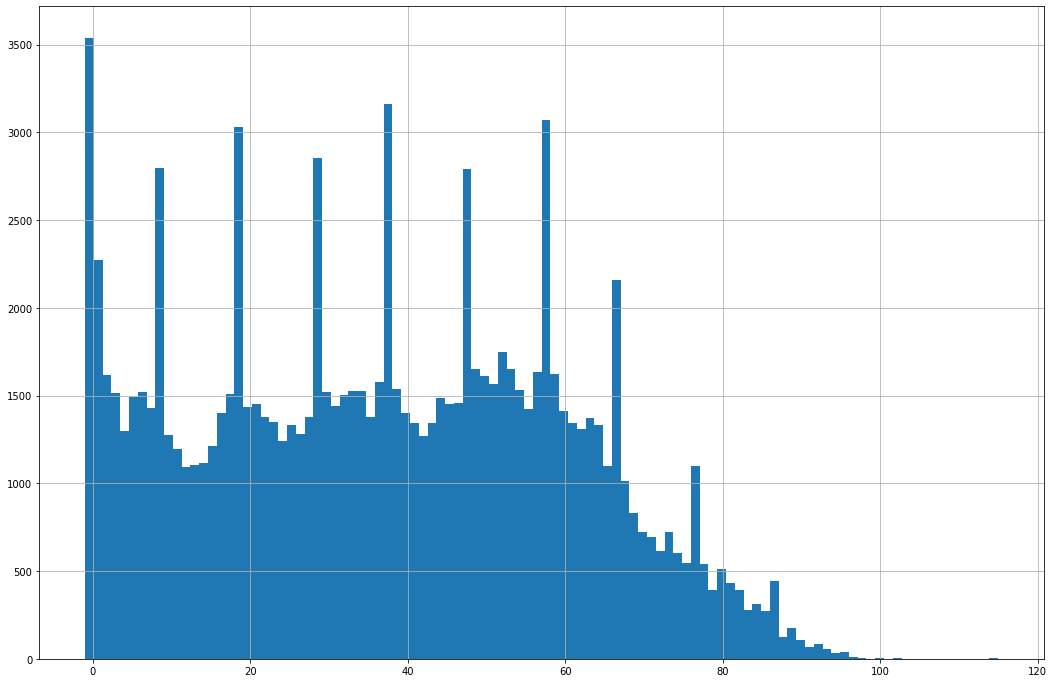

In [37]:
# plotando o histograma da idade
plt.figure(figsize=(18,12))
df_consultas['Idade'].hist(bins=len(df_consultas['Idade'].unique()));

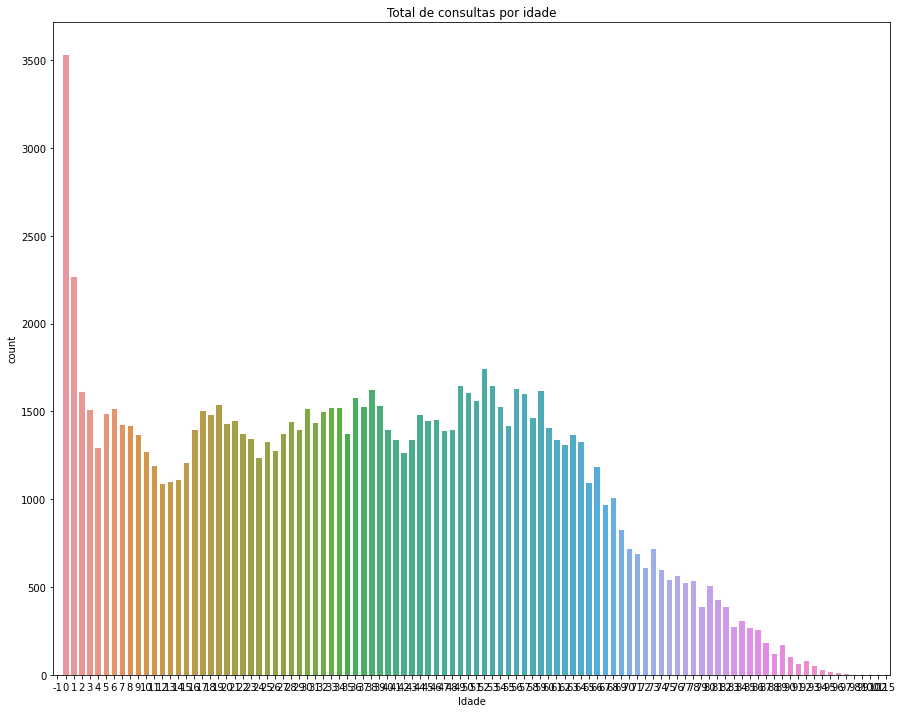

In [38]:
plt.figure(figsize=(15,12))
plt.title('Total de consultas por idade')
sns.set(style='whitegrid')
sns.countplot(x='Idade', data=df_consultas)
plt.show()

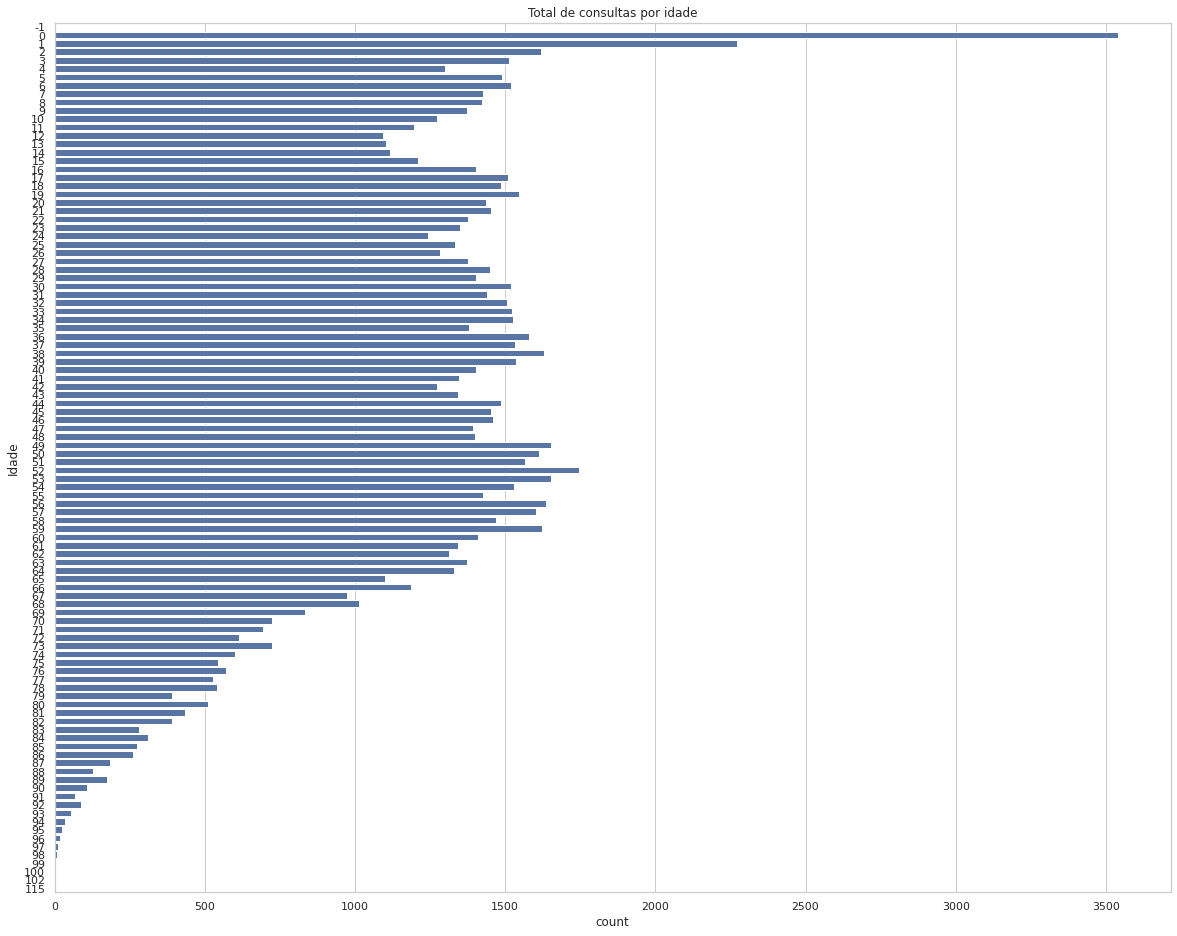

In [39]:
plt.figure(figsize=(20,16))
plt.title('Total de consultas por idade')
sns.countplot(y='Idade', color = 'b', data=df_consultas)
plt.show()

In [50]:
def percentual(bool_string, characteristic): 
    query1_total = len(df_consultas.query(bool_string + "and Não_comparecimento == 'Yes'"))
    query2_total = len(df_consultas.query(bool_string))
    return_pct = (query1_total / query2_total) * 100
    print('Percentual de pacientes {} NÃO compareceram à consulta'.format(characteristic), return_pct)


In [51]:
percentual('Bolsa_família == 1', 'que recebe bolsa-família e')
percentual('Bolsa_família == 0', 'que NÃO recebe bolsa-família e')

Percentual de pacientes que recebe bolsa-família e NÃO compareceram à consulta 23.73630420771568
Percentual de pacientes que NÃO recebe bolsa-família e NÃO compareceram à consulta 19.807155900708366


In [52]:
percentual("Gênero == 'F'", 'mulheres que')
percentual("Gênero == 'M'", 'homens que')

Percentual de pacientes mulheres que NÃO compareceram à consulta 20.31458797327394
Percentual de pacientes homens que NÃO compareceram à consulta 19.967947889471915


In [43]:
percentual('Deficiência == 0', 'que NÃO possuem deficiência e')
percentual('Deficiência == 1', 'que possuem deficiência e')

Percentual de pacientes que NÃO possuem deficiência e NÃO compareceram à consulta 20.235302809227417
Percentual de pacientes que possuem deficiência e NÃO compareceram à consulta 17.92360430950049


In [44]:
percentual('Hipertensão == 0', 'que NÃO é hipertenso e')
percentual('Hipertensão == 1', 'que é hipertenso e')

Percentual de pacientes que NÃO é hipertenso e NÃO compareceram à consulta 20.903680995424114
Percentual de pacientes que é hipertenso e NÃO compareceram à consulta 17.301958625751112


In [45]:
percentual('Diabetes == 0', 'que NÃO é diabetes e')
percentual('Diabetes == 1', 'que é diabetes e')

Percentual de pacientes que NÃO é diabetes e NÃO compareceram à consulta 20.362824612025268
Percentual de pacientes que é diabetes e NÃO compareceram à consulta 18.00327332242226


**A idade ou o sexo afetaram a frequência às consultas?**

`Agora vamos ver a distribuição de idades que falta a consulta.` 

**Para isso, iremos criar faixas de idades!**

Agruparei as idades dos pacientes em grupos para estudar com mais eficácia como cada grupo se saiu com a frequência às consultas. 

Usarei o histograma para orientar minhas seleções de faixa etária, visto a seguir, dividir usando a função `.cut ()`

In [141]:
df_consultas['faixas_idades'] = pd.cut(df_consultas.Idade, 
                                   bins=[-2, 12, 25, 35, 45, 55, 65, 75, 115], 
                                   labels= ['de 12 abaixo', '13 à 25', '26 à 35', 
                                            '36 à 45', '46 à 55', '56 à 65', 
                                            '66 à 75', 'de 76 acima'])

In [142]:
def faixa_idade(bool_string): 
    query1_total = len(df_consultas.query(bool_string + "and Não_comparecimento == 'Yes'" ))
    query2_total = len(df_consultas.query(bool_string))
    return_pct = (query1_total / query2_total) * 100
    return return_pct

In [143]:
pct_under_12 = faixa_idade("faixas_idades == 'de 12 abaixo'")
pct_13_25 = faixa_idade("faixas_idades == '13 à 25'")
pct_26_35 = faixa_idade("faixas_idades == '26 à 35'")
pct_36_45 = faixa_idade("faixas_idades == '36 à 45'")
pct_46_55 = faixa_idade("faixas_idades == '46 à 55'")
pct_56_65 = faixa_idade("faixas_idades == '56 à 65'")
pct_66_75 = faixa_idade("faixas_idades == '66 à 75'")
pct_76_up = faixa_idade("faixas_idades == 'de 76 acima'")

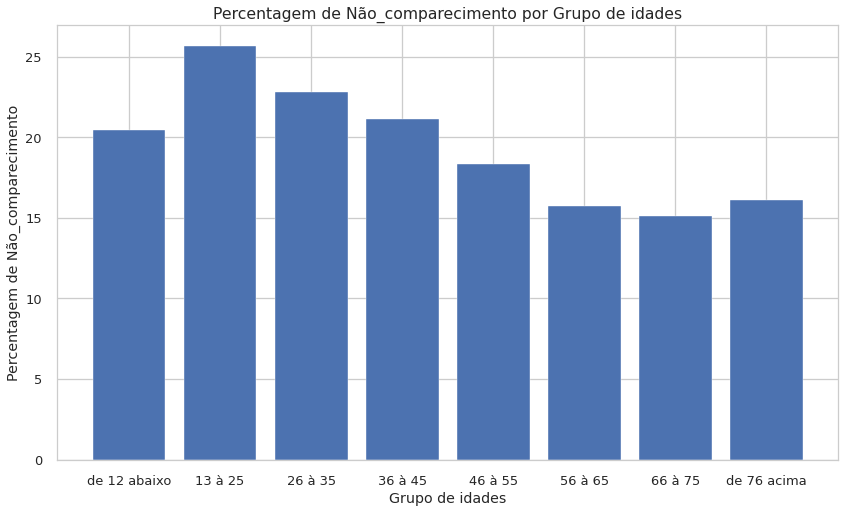

In [144]:
percentual_idade = [pct_under_12, pct_13_25, pct_26_35, pct_36_45, pct_46_55, 
                    pct_56_65, pct_66_75, pct_76_up]
labels = ('de 12 abaixo', '13 à 25', '26 à 35', '36 à 45', '46 à 55', 
                              '56 à 65', '66 à 75', 'de 76 acima')
y_pos = np.arange(len(labels))

plt.style.use("seaborn-talk")


plt.figure(figsize=(14, 8))
plt.bar(y_pos, percentual_idade, color='b');
plt.xticks(y_pos, labels);
plt.ylabel('Percentagem de Não_comparecimento');
plt.xlabel('Grupo de idades');
plt.title('Percentagem de Não_comparecimento por Grupo de idades');

In [153]:
pct_under_12 = faixa_idade("faixas_idades == 'de 12 abaixo'")
pct_under_12

20.473451537766792

Esta visualização permite-nos ver que a faixa etária com maior taxa de ausência na consulta é de 13 a 25 anos. Com exceção dos menores de 13 anos, as ausências parecem diminuir com a idade, embora haja um ligeiro aumento acima de 76 anos.

Abaixo, agrupei as faltas por gênero, o que mostrou uma diferença de menos de 1%. O gênero não afeta o não comparecimento por nenhuma significância estatística.

In [206]:
percentual("Gênero == 'F'", "mulher")
percentual("Gênero == 'M'", "homem")

Percentual de pacientes mulher NÃO compareceram à consulta 20.31458797327394
Percentual de pacientes homem NÃO compareceram à consulta 19.967947889471915


In [207]:
# separando a base de dados por faixa de idades entre 13 e 25 anos
idades_13_25 = df_consultas[(df_consultas.Idade >= 13) & (df_consultas['Idade'] <= 25)] 
print(idades_13_25.value_counts().sum() / df_consultas.shape[0] * 100)

15.89023496521212


In [208]:
# separando a base de dados por toda as faixa de idades e contabilizando
idade_12_menor = df_consultas[(df_consultas.Idade <= 12)].value_counts().sum()
idade_13_25 = df_consultas[(df_consultas.Idade >= 13) & (df_consultas['Idade'] <= 25)].value_counts().sum()
idade_26_35 = df_consultas[(df_consultas.Idade >= 26) & (df_consultas['Idade'] <= 35)].value_counts().sum()
idade_36_45 = df_consultas[(df_consultas.Idade >= 36) & (df_consultas['Idade'] <= 45)].value_counts().sum()
idade_46_55 = df_consultas[(df_consultas.Idade >= 46) & (df_consultas['Idade'] <= 55)].value_counts().sum()
idade_56_65 = df_consultas[(df_consultas.Idade >= 56) & (df_consultas['Idade'] <= 65)].value_counts().sum()
idade_66_75 = df_consultas[(df_consultas.Idade >= 66) & (df_consultas['Idade'] <= 75)].value_counts().sum()
idade_76_acima = df_consultas[(df_consultas.Idade >= 76)].value_counts().sum()

In [209]:
total_faixa_idades = idade_12_menor + idade_13_25 + idade_26_35 + idade_36_45 + idade_46_55 + idade_56_65 + idade_66_75 + idade_76_acima
total_faixa_idades

110527

In [210]:
# separando a base de dados por faixa de idades
# idade_13_25 = df_consultas[(df_consultas.Idade > 13) & (df_consultas['Idade'] <= 25)] 
print(f'''Percentagem de ausência na consulta
- igual e menor de 12 anos: {((idade_12_menor / total_faixa_idades)*100):.2f}%
- entre de 13 e 25 anos: {((idade_13_25 / total_faixa_idades)*100):.2f}%
- entre de 26 e 35 anos: {((idade_26_35 / total_faixa_idades)*100):.2f}%
- entre de 36 e 45 anos: {((idade_36_45 / total_faixa_idades)*100):.2f}%
- entre de 46 e 55 anos: {((idade_46_55 / total_faixa_idades)*100):.2f}%
- entre de 56 e 65 anos: {((idade_56_65 / total_faixa_idades)*100):.2f}%
- entre de 66 e 75 anos: {((idade_66_75 / total_faixa_idades)*100):.2f}%
- de 76 anos acima: {((idade_76_acima / total_faixa_idades)*100):.2f}%
''') 

Percentagem de ausência na consulta
- igual e menor de 12 anos: 19.03%
- entre de 13 e 25 anos: 15.89%
- entre de 26 e 35 anos: 13.03%
- entre de 36 e 45 anos: 13.19%
- entre de 46 e 55 anos: 13.97%
- entre de 56 e 65 anos: 12.85%
- entre de 66 e 75 anos: 7.16%
- de 76 anos acima: 4.88%



In [211]:
idade_igual_menor_12 = df_consultas.query('Idade <= 12').value_counts().sum()
idade_13_25 = df_consultas.query('Idade >= 13 & Idade <= 25').value_counts().sum()
idade_26_35 = df_consultas.query('Idade >= 26 & Idade <= 35').value_counts().sum()
idade_36_45 = df_consultas.query('Idade >= 36 & Idade <= 45').value_counts().sum()
idade_46_55 = df_consultas.query('Idade >= 46 & Idade <= 55').value_counts().sum()
idade_56_65 = df_consultas.query('Idade >= 56 & Idade <= 65').value_counts().sum()
idade_66_75 = df_consultas.query('Idade >= 66 & Idade <= 75').value_counts().sum()
idade_76_adiante = df_consultas.query('Idade >= 76').value_counts().sum()

In [212]:
print(f'''Faixas de Idade:
\tDe 12 abaixo: {idade_igual_menor_12}
\tDe 13 à 25: {idade_13_25}
\tDe 26 à 35: {idade_26_35}
\tDe 36 à 45: {idade_36_45}
\tDe 46 à 55: {idade_46_55}
\tDe 56 à 65: {idade_56_65}
\tDe 66 à 75: {idade_66_75}
\tDe 76 acima: {idade_76_adiante}
''')

Faixas de Idade:
	De 12 abaixo: 21037
	De 13 à 25: 17563
	De 26 à 35: 14404
	De 36 à 45: 14582
	De 46 à 55: 15437
	De 56 à 65: 14203
	De 66 à 75: 7909
	De 76 acima: 5392



In [213]:
total_faixa_idades = idade_igual_menor_12 + idade_13_25 + idade_26_35 + idade_36_45 + idade_46_55 + idade_56_65 + idade_66_75 + idade_76_adiante
total_faixa_idades

110527

In [214]:
idade_igual_menor_12 = df_consultas.query('Idade <= 12').value_counts().sum()
idade_igual_menor_12

21037

In [215]:
# separando a base de dados por faixa de idades
# idade_13_25 = df_consultas[(df_consultas.Idade > 13) & (df_consultas['Idade'] <= 25)] 
print(f'''Percentagem de ausência na consulta
- igual e menor de 12 anos: {((idade_igual_menor_12 / total_faixa_idades)*100):.2f}%
- entre de 13 e 25 anos: {((idade_13_25 / total_faixa_idades)*100):.2f}%
- entre de 26 e 35 anos: {((idade_26_35 / total_faixa_idades)*100):.2f}%
- entre de 36 e 45 anos: {((idade_36_45 / total_faixa_idades)*100):.2f}%
- entre de 46 e 55 anos: {((idade_46_55 / total_faixa_idades)*100):.2f}%
- entre de 56 e 65 anos: {((idade_56_65 / total_faixa_idades)*100):.2f}%
- entre de 66 e 75 anos: {((idade_66_75 / total_faixa_idades)*100):.2f}%
- de 76 anos acima: {((idade_76_adiante / total_faixa_idades)*100):.2f}%''')

Percentagem de ausência na consulta
- igual e menor de 12 anos: 19.03%
- entre de 13 e 25 anos: 15.89%
- entre de 26 e 35 anos: 13.03%
- entre de 36 e 45 anos: 13.19%
- entre de 46 e 55 anos: 13.97%
- entre de 56 e 65 anos: 12.85%
- entre de 66 e 75 anos: 7.16%
- de 76 anos acima: 4.88%


**Quantos valores diferentes encontramos para a variável dos SMS_recebido?**

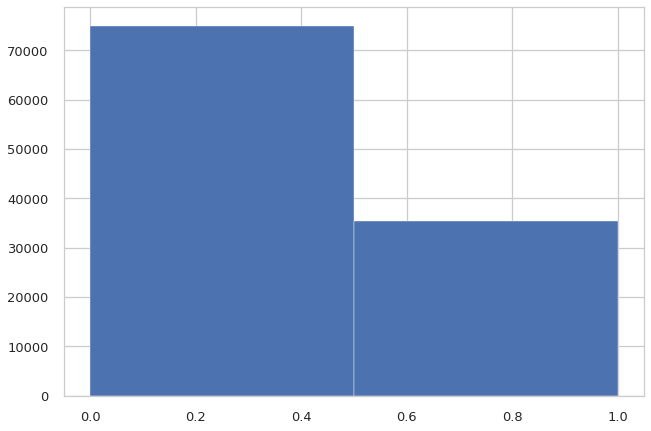

In [ ]:
df_consultas['SMS_recebido'].hist(bins=len(df_consultas['SMS_recebido'].unique()));

In [216]:
df_consultas['SMS_recebido'].unique()

array([0, 1])

In [ ]:
# criando uma nova coluna -> Tempo de espera (diferença entre a data em que a consulta foi agendada e o dia da consulta)
df_consultas.Dia_agendado = pd.to_datetime(df_consultas.Dia_agendado)  #transformando as colunas para o tipo datetime
df_consultas.Dia_consulta = pd.to_datetime(df_consultas.Dia_consulta)

In [ ]:
# realizando a diferença entre o momento da marcação da consulta e o dia da consulta
tempo_espera = df_consultas.Dia_agendado-df_consultas.Dia_consulta

In [ ]:
# visualizando as 10 primeiras linhas
tempo_espera[:10]

0     0 days 18:38:08
1     0 days 16:08:27
2     0 days 16:19:04
3     0 days 17:29:31
4     0 days 16:07:23
5   -2 days +08:36:51
6   -2 days +15:05:12
7   -2 days +15:39:58
8     0 days 08:02:16
9   -2 days +12:48:25
dtype: timedelta64[ns]

In [ ]:
# inserindo a coluna "Tempo_espera" na base de dados
# realizando uma operação "lambda"
df_consultas['Tempo_espera'] = tempo_espera.apply(lambda x: x.days) # transforma os valores em dias 

In [ ]:
df_consultas.head(10) # visualizando as 10 primeiras linhas

,Id_paciente,Id_consulta,Gênero,Dia_agendado,Dia_consulta,Idade,Bairro,Bolsa_família,Hipertensão,Diabetes,Alcoolismo,Deficiência,SMS_recebido,Não_comparecimento,Tempo_espera
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,-2
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,-2
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,-2
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,-2


In [ ]:
# dados gerais da base de dados
df_consultas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   Id_paciente         110527 non-null  float64            
 1   Id_consulta         110527 non-null  int64              
 2   Gênero              110527 non-null  object             
 3   Dia_agendado        110527 non-null  datetime64[ns, UTC]
 4   Dia_consulta        110527 non-null  datetime64[ns, UTC]
 5   Idade               110527 non-null  int64              
 6   Bairro              110527 non-null  object             
 7   Bolsa_família       110527 non-null  int64              
 8   Hipertensão         110527 non-null  int64              
 9   Diabetes            110527 non-null  int64              
 10  Alcoolismo          110527 non-null  int64              
 11  Deficiência         110527 non-null  int64              
 12  SMS_recebido    

In [ ]:
# dados estatísticos somente da coluna "Tempo_espera"
df_consultas.Tempo_espera.describe()

count    110527.000000
mean        -10.183702
std          15.254996
min        -179.000000
25%         -15.000000
50%          -4.000000
75%           0.000000
max           6.000000
Name: Tempo_espera, dtype: float64

**Qual foi o impacto da diferença de tempo entre o dia em que a consulta foi agendada e o dia da consulta?**

Todos esses indicadores que explorei envolvem características do paciente. Agora vejo duas variáveis ​​que não estão relacionadas ao perfil do paciente: 
- a diferença de tempo entre o dia em que a consulta foi agendada;
- o dia da consulta e,
- se um lembrete por mensagem de texto foi ou não enviado.

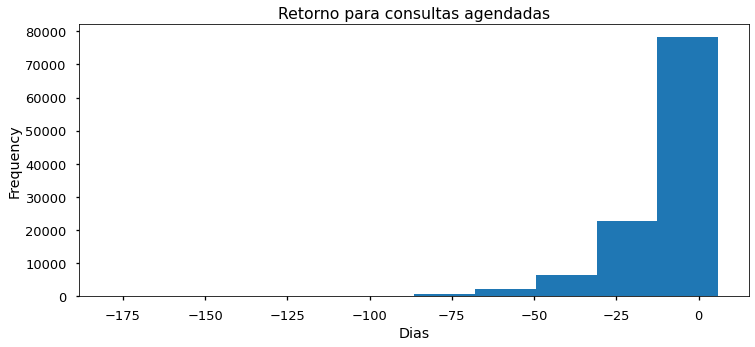

In [ ]:
plt.style.use("seaborn-talk")

ax = df_consultas['Tempo_espera'].plot.hist(title='Retorno para consultas agendadas', 
                                                                     figsize=(12, 5));
ax.set_xlabel('Dias');

In [ ]:
# t = [-1, 1, 3, 14, 179]
# t_bins = pd.to_timedelta(t, unit='days')
# labels = ['mesmo dia', '1 à 3 dias', '4 à 14 dias', 'Mais de 14 dias']

# df_consultas['Tempo_espera_bins'] = pd.cut(df_consultas['Tempo_espera'], bins=t_bins, labels=labels)
# df_consultas.groupby('Tempo_espera_bins').Não_comparecimento.value_counts()

In [ ]:
# r = '#b35806'
# p = '#542788'
# plt.figure(figsize=(9,4))
# sns.countplot(data=df_consultas, x='Tempo_espera_bins', hue='Não_comparecimento', palette=[r, p]);
# plt.legend(['Atendidas', 'Não comparecimento'])
# plt.xlabel('Retorno para compromissos agendados');
# plt.ylabel('Número de compromissos')
# plt.title('Distribuição de faltas vs. Atendidas por prazo de entrega');

**Iniciando o tratamento dos dados**

**Qual é a menor e maior idade, respectivamente, presente no dataset?**

In [ ]:
# encontrando as idades negativas
df_consultas[df_consultas['Idade'] < 0]['Idade'].value_counts()

-1    1
Name: Idade, dtype: int64

In [ ]:
# filtrando apenas idades maiores que 0
df_consultas_filtrado = df_consultas[df_consultas['Idade'] >= 0]
df_consultas_filtrado.shape

(110526, 16)

**Quantos valores de idade menores do que 0 existem no dataframe?**

In [ ]:
# transformando os tempo de espera para um valor não negativo
df_consultas_filtrado['Tempo_espera'] = df_consultas_filtrado['Tempo_espera'].apply(lambda x: abs(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


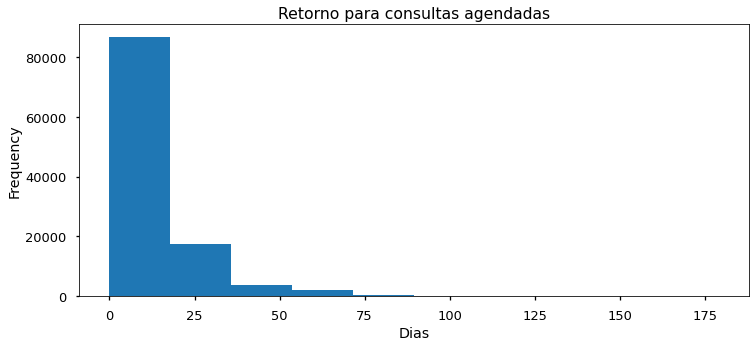

In [ ]:
plt.style.use("seaborn-talk")

ax = df_consultas_filtrado['Tempo_espera'].plot.hist(title='Retorno para consultas agendadas', 
                                                                     figsize=(12, 5));
ax.set_xlabel('Dias');

In [ ]:
df_consultas_filtrado.head()

,Id_paciente,Id_consulta,Gênero,Dia_agendado,Dia_consulta,Idade,Bairro,Bolsa_família,Hipertensão,Diabetes,Alcoolismo,Deficiência,SMS_recebido,Não_comparecimento,Tempo_espera,Tempo_espera_bins
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,mesmo dia
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,mesmo dia
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,mesmo dia
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,mesmo dia
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,mesmo dia


In [ ]:
# aplicando a transformação para os dados categóricos
categoricas=['Bairro','Gênero','Não_comparecimento']
for coluna in categoricas:
  df_consultas_filtrado[coluna]= pd.Categorical(df_consultas_filtrado[coluna]).codes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_consultas_filtrado.head(8)

,Id_paciente,Id_consulta,Gênero,Dia_agendado,Dia_consulta,Idade,Bairro,Bolsa_família,Hipertensão,Diabetes,Alcoolismo,Deficiência,SMS_recebido,Não_comparecimento,Tempo_espera,Tempo_espera_bins
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,39,0,1,0,0,0,0,0,0,mesmo dia
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,39,0,0,0,0,0,0,0,0,mesmo dia
2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,45,0,0,0,0,0,0,0,0,mesmo dia
3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,54,0,0,0,0,0,0,0,0,mesmo dia
4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,39,0,1,1,0,0,0,0,0,mesmo dia
5,9.598513e+13,5626772,0,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,58,0,1,0,0,0,0,0,2,mesmo dia
6,7.336882e+14,5630279,0,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,25,0,0,0,0,0,0,1,2,mesmo dia
7,3.449833e+12,5630575,0,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,25,0,0,0,0,0,0,1,2,mesmo dia


**Qual o tipo de transformação foi utilizada?**

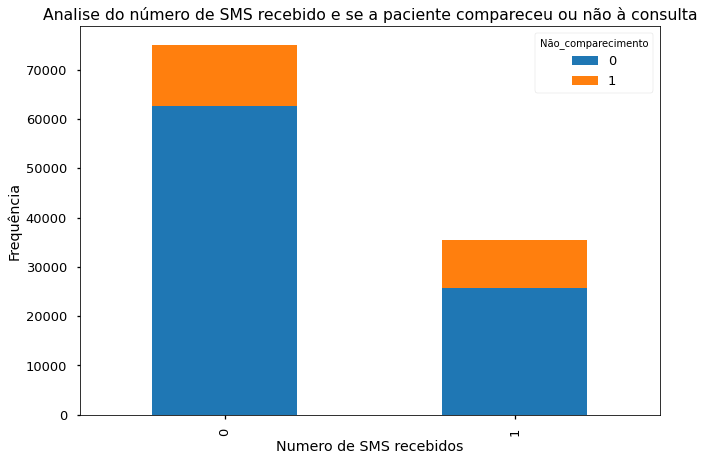

In [ ]:
# analisando os SMS enviados e o número de vezes que o paciente compareceu ou não 
sms_x_comparecer = df_consultas_filtrado.groupby(['SMS_recebido', 'Não_comparecimento'])['SMS_recebido'].count().unstack('Não_comparecimento').fillna(0)
sms_x_comparecer[[0, 1]].plot(kind='bar', stacked=True) 
plt.title('Analise do número de SMS recebido e se a paciente compareceu ou não à consulta') 
plt.xlabel('Numero de SMS recebidos') 
plt.ylabel('Frequência');

In [ ]:
sms_x_comparecer

Não_comparecimento,0,1
SMS_recebido,,
0,62509,12535
1,25698,9784


**Qual é a proporção de pacientes que receberam o sms e NÃO compareceram?**

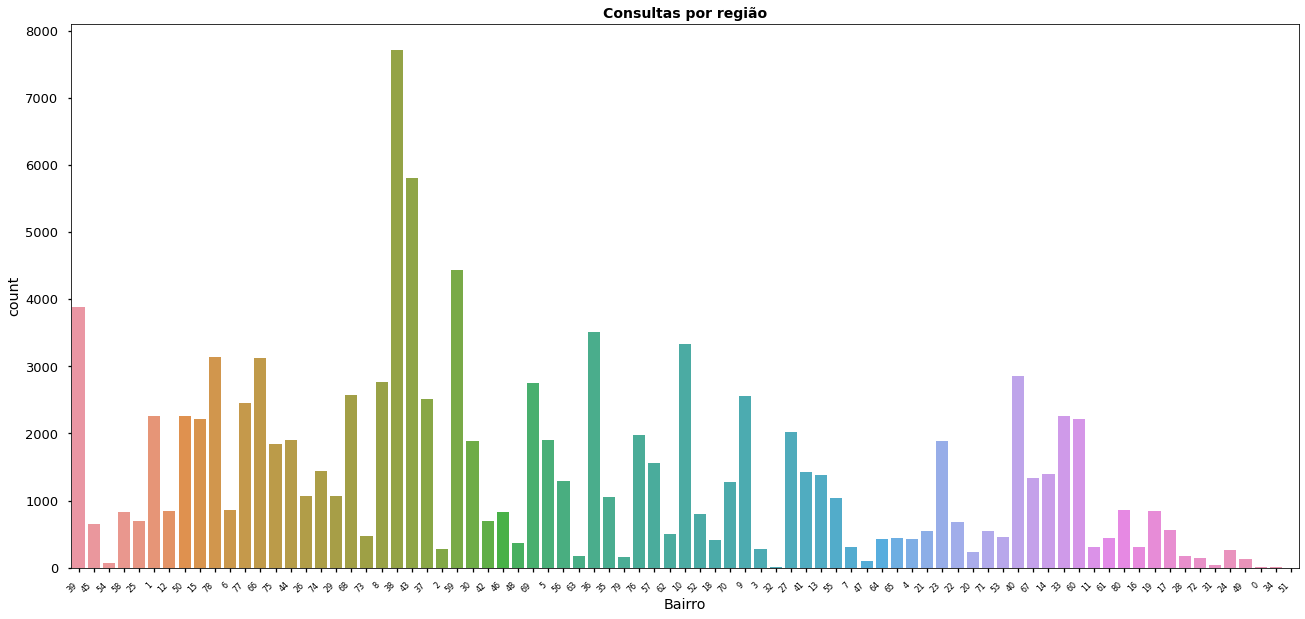

In [ ]:
#plotando o número de consultas por região 
regioes = df_consultas_filtrado['Bairro'].unique()
plt.figure(figsize=(22,10))
ax = sns.countplot(x='Bairro', data=df_consultas_filtrado, order=regioes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)
plt.title('Consultas por região', fontsize=14, fontweight='bold')
plt.show();

**Qual região possui o maior número de consultas marcadas?**

In [ ]:
#selecionando os dados para a construção da previsão
entradas = ['Gênero','Idade','Bairro','Bolsa_família','Hipertensão',
            'Diabetes','Alcoolismo','SMS_recebido','Tempo_espera']
saida = ['Não_comparecimento']

In [ ]:
x = df_consultas_filtrado[entradas]
y = df_consultas_filtrado[saida]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [ ]:
x_train.shape

(77368, 9)

In [ ]:
# aplicando um modelo de classificação - árvore de decisão
# importando a biblioteca
from sklearn.tree import DecisionTreeClassifier

clf_arvore = DecisionTreeClassifier()   # instanciando o algoritmo
clf_arvore.fit(x_train, y_train)  # treinando o modelo

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# realizando a previsão com os dados
y_previsto = clf_arvore.predict(x_test) 

In [ ]:
# avaliando acurácia do modelo
# importando a biblioteca
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_test, y_previsto)
print('Acurácia da àrvore de Decisão: ',acuracia)

Acurácia da àrvore de Decisão:  0.7335786235599252


In [ ]:
# contruindo a matriz de confusão
# importando a biblioteca
from sklearn.metrics import classification_report, confusion_matrix

matriz_confusao = confusion_matrix(y_test, y_previsto)
print(matriz_confusao)

[[22227  4258]
 [ 4576  2097]]


In [ ]:
# relatório geral
print(classification_report(y_test,y_previsto))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     26485
           1       0.33      0.31      0.32      6673

    accuracy                           0.73     33158
   macro avg       0.58      0.58      0.58     33158
weighted avg       0.73      0.73      0.73     33158



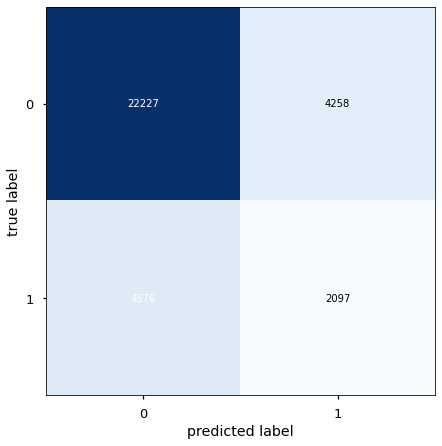

In [ ]:
# plotando a matriz de confusão
# importando a biblioteca
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show();

**Material de consulta**
- https://www.kaggle.com/catherinenewcomb/attendance-of-medical-appts